In [2]:
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
matplotlib.style.use("ggplot")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

In [3]:
train = fetch_20newsgroups(subset="train")
vectorizer = CountVectorizer(binary=True) # BoW, binary
vectorizer.fit_transform(train.data)

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [54]:
def get(target_category=0, size=100):
    # get positive
    categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
    positive_train = fetch_20newsgroups(subset="train", categories=[categories[target_category]])
    positive_test = fetch_20newsgroups(subset="test", categories=[categories[target_category]])
    # get negative
    del categories[target_category]
    negative_train = fetch_20newsgroups(subset="train", categories=categories)
    negative_test = fetch_20newsgroups(subset="test", categories=categories)
    size_sep = int(size/2)
    # train
    train_x = np.hstack((positive_train.data[:size_sep], negative_train.data[:size_sep])).reshape(size,1)
    train_y = np.hstack((np.ones(size_sep, dtype="int32"), np.zeros(size_sep, dtype="int32"))).reshape(size,1)
    train = np.hstack((train_x, train_y))
    np.random.shuffle(train)
    # test
    test_x = np.hstack((positive_test.data[:size_sep], negative_test.data[:size_sep])).reshape(size,1)
    test_y = np.hstack((np.ones(size_sep, dtype="int32"), np.zeros(size_sep, dtype="int32"))).reshape(size,1)
    test = np.hstack((test_x, test_y))
    np.random.shuffle(test)
    train_x = np.array(train[:,0], dtype="object")
    train_y = np.array(train[:,1], dtype="int32")
    test_x = np.array(test[:,0], dtype="object")
    test_y = np.array(test[:,1], dtype="int32")
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = get()
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

100
100
100
100


1	1.1640698909759521[sec]
2	1.093393087387085[sec]
3	1.1537010669708252[sec]
4	1.0107190608978271[sec]
5	1.0494699478149414[sec]
6	1.1787738800048828[sec]
7	0.9977588653564453[sec]
8	0.990164041519165[sec]
9	1.019162893295288[sec]
10	1.017685890197754[sec]
11	1.050227165222168[sec]
12	1.0754361152648926[sec]
13	0.9868249893188477[sec]
14	1.0648059844970703[sec]
15	1.0852940082550049[sec]
16	1.044719934463501[sec]
17	1.076491117477417[sec]
18	1.1635189056396484[sec]
19	1.2017638683319092[sec]
20	1.333348035812378[sec]
21	1.2142620086669922[sec]
22	1.2376909255981445[sec]
23	1.2574670314788818[sec]
24	1.2667629718780518[sec]
25	1.1992170810699463[sec]
26	1.2616848945617676[sec]
27	1.1052629947662354[sec]
28	1.1493809223175049[sec]
29	1.0252389907836914[sec]
30	1.2195749282836914[sec]


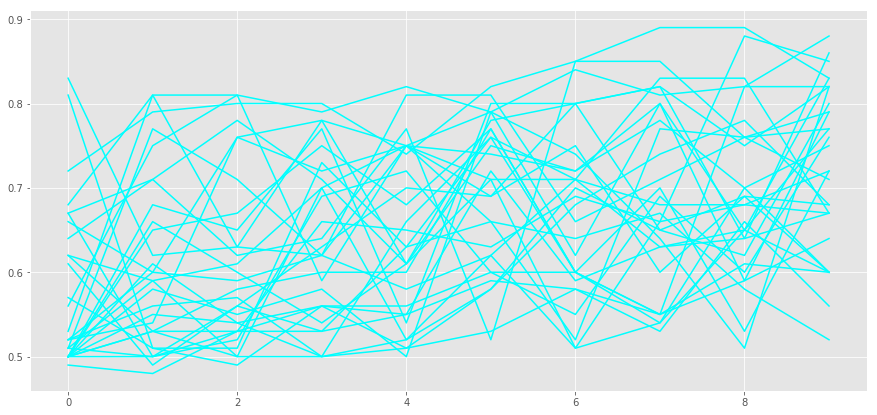

In [58]:
from sklearn.linear_model import SGDClassifier

SIZE = 100
FREQ = 10

# simulate
scores = []
for i in range(30):
    start = time.time()
    score = []
    train_x, train_y, test_x, test_y = get(target_category=np.random.randint(0,20), size=SIZE)
    train_x, test_x = vectorizer.transform(train_x), vectorizer.transform(test_x)
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, n_iter=None)
    for j in range(0, SIZE, FREQ):
        x = train_x[j:j+FREQ]
        y = train_y[j:j+FREQ]
        clf.partial_fit(x,y,classes=[0,1])
        score.append(clf.score(test_x, test_y))
    scores.append(score)
    elapsed_time = time.time()-start
    print("{}\t{}[sec]".format(i+1, elapsed_time))
    
# plot
x = np.arange(0,len(scores[0]))
plt.figure(figsize=(15,7))
for score in scores:
    plt.plot(x,score,color="cyan")
plt.show()

1	1.1704680919647217[sec]
2	1.121962070465088[sec]
3	1.086548089981079[sec]
4	1.1267890930175781[sec]
5	1.0971770286560059[sec]
6	1.1495130062103271[sec]
7	1.171915054321289[sec]
8	1.161761999130249[sec]
9	1.198866844177246[sec]
10	1.1551158428192139[sec]
11	1.2373738288879395[sec]
12	1.1321330070495605[sec]
13	1.1519298553466797[sec]
14	1.188410997390747[sec]
15	1.135530948638916[sec]
16	1.2051830291748047[sec]
17	1.1070339679718018[sec]
18	1.1425349712371826[sec]
19	1.1524100303649902[sec]
20	1.0632250308990479[sec]
21	1.0886850357055664[sec]
22	1.1302568912506104[sec]
23	1.1400299072265625[sec]
24	1.1453289985656738[sec]
25	1.2740261554718018[sec]
26	1.1956520080566406[sec]
27	1.147719144821167[sec]
28	1.1358628273010254[sec]
29	1.1352190971374512[sec]
30	1.0939829349517822[sec]


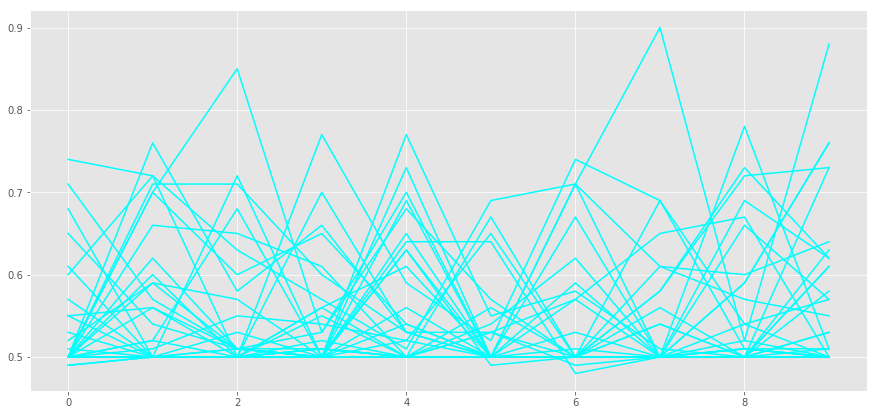

In [57]:
from sklearn.naive_bayes import MultinomialNB

SIZE = 100
FREQ = 10

# simulate
scores = []
for i in range(30):
    start = time.time()
    score = []
    train_x, train_y, test_x, test_y = get(target_category=np.random.randint(0,20), size=SIZE)
    train_x, test_x = vectorizer.transform(train_x), vectorizer.transform(test_x)
    clf = MultinomialNB(alpha=1.0)
    for j in range(0, SIZE, FREQ):
        x = train_x[j:j+FREQ]
        y = train_y[j:j+FREQ]
        clf.fit(x,y)
        score.append(clf.score(test_x, test_y))
    scores.append(score)
    elapsed_time = time.time()-start
    print("{}\t{}[sec]".format(i+1, elapsed_time))
    
# plot
x = np.arange(0,len(scores[0]))
plt.figure(figsize=(15,7))
for score in scores:
    plt.plot(x,score,color="cyan")
plt.show()